## Car Brand Classification Using Deep Learning

In [4]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

- ResNet-50 is a convolutional neural network that is 50 layers deep. 
- You can load a pretrained version of the network trained on more than a million images from the ImageNet database

- ImageDataGenerator is a gem! It lets you augment your images in real-time while your model is still training!

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# path of datasets
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights
# using ResNet50 for use same images
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# [3] : rgb channel
# imagenet: use same image weights what we have
# include_top=False: i'm using same imagenet

94765736/94765736 [==============================] - 64s 1us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

- glob (short for global) is used to return all file paths that match a specific pattern.

In [9]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

- Flatten is required before connected to the fully conneted layer

In [11]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten')>

In [12]:
# dense length of the folders
prediction = Dense(len(folders), activation='softmax')(x)
prediction

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense')>

In [13]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

- now in the ouput layer have only three outputs

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

- Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data.

In [16]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255, # all the pixel convert btwenn 0 to 1
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# in test data we should not do any augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# reading all the images in the dataset
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data = test_set,
  epochs = 50,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)
)

C:\Users\hp\AppData\Local\Temp\ipykernel_9768\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 23s 11s/step - loss: 5.8352 - accuracy: 0.3125 - val_loss: 14.5212 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 13s 9s/step - loss: 11.4853 - accuracy: 0.3125 - val_loss: 5.1418 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 12s 8s/step - loss: 4.7701 - accuracy: 0.3438 - val_loss: 6.0522 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 13s 9s/step - loss: 7.1135 - accuracy: 0.3906 - val_loss: 8.6346 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 14s 9s/step - loss: 5.9404 - accuracy: 0.3906 - val_loss: 4.3764 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 12s 8s/step - loss: 3.0264 - accuracy: 0.4062 - val_loss: 2.9327 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 12s 8s/step - loss: 3.5427 - accuracy: 0.4844 - val_loss: 4.0394 - val_accuracy: 0.5172
Epoch 8/50
2/2 [===============

In [22]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

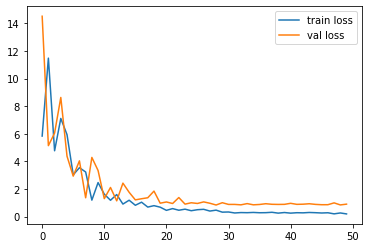

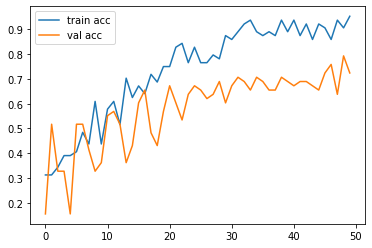

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

- An H5 file is a data file saved in the Hierarchical Data Format (HDF)

In [25]:
# prediction 
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 8s 2s/step


array([[7.47133559e-03, 9.86230910e-01, 6.29777135e-03],
       [9.78644192e-01, 1.80946477e-02, 3.26121715e-03],
       [9.24790084e-01, 6.54285401e-02, 9.78140067e-03],
       [7.08357871e-01, 7.75636435e-02, 2.14078516e-01],
       [3.00907612e-01, 4.58456218e-01, 2.40636215e-01],
       [1.54908866e-01, 3.20573896e-02, 8.13033700e-01],
       [4.51275595e-02, 8.91597748e-01, 6.32746816e-02],
       [2.99147338e-01, 6.15316749e-01, 8.55359584e-02],
       [9.33328092e-01, 1.85709167e-02, 4.81010079e-02],
       [1.08641163e-01, 6.88669503e-01, 2.02689379e-01],
       [1.36136514e-04, 1.10361527e-03, 9.98760223e-01],
       [7.11860955e-02, 1.33194756e-02, 9.15494442e-01],
       [2.20857877e-02, 9.09086943e-01, 6.88272417e-02],
       [3.04938376e-01, 5.54586984e-02, 6.39602959e-01],
       [6.52395546e-01, 3.03839296e-01, 4.37651910e-02],
       [3.75724062e-02, 9.07935619e-01, 5.44919819e-02],
       [7.68641293e-01, 2.30409488e-01, 9.49234411e-04],
       [5.78750253e-01, 3.73259

In [26]:
# take highest velue that particular index
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [27]:
# load the model
model = load_model('model_resnet50.h5')

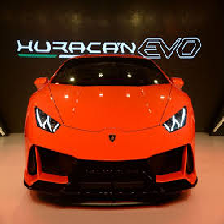

In [28]:
# get one image from test dataset
img = image.load_img('Datasets/Test/lamborghini/10.jpg', target_size=(224,224))
img

In [29]:
# image convert into np array
x = image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [30]:
x.shape

(224, 224, 3)

In [31]:
# rescale image
x = x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [32]:
# expand the dimension
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
# predict
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.05704903, 0.00633636, 0.93661463]], dtype=float32)

In [34]:
# get index
a = np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 179ms/step


array([2], dtype=int64)